There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
Predict the coordinates of a bounding box of an item in an image.
Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).
In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

Hyperparameter	Typical value
Input layer shape	Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)
Hidden layer(s)	Problem specific, minimum = 1, maximum = unlimited
Neurons per hidden layer	Problem specific, generally 10 to 100
Output layer shape	Same shape as desired prediction shape (e.g. 1 for house price)
Hidden activation	Usually ReLU (rectified linear unit)
Output activation	None, ReLU, logistic/tanh
Loss function	MSE (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if outliers
Optimizer	SGD (stochastic gradient descent), Adam

In [1]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.15.0
Notebook last run (end-to-end): 2024-06-26 11:16:48.855721


##Creating data to fit

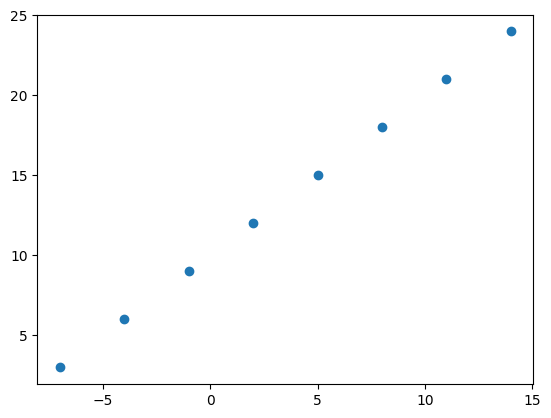

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);


In [3]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
house_info.shape

TensorShape([3])

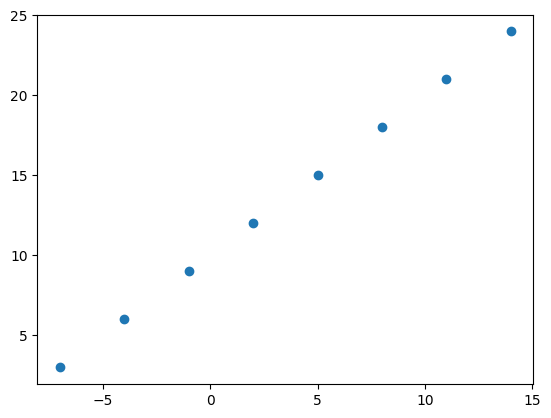

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [6]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

In [7]:
# Let's take a look at the single examples invidually
X[0], y[0]


(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [8]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 20.0602 - mae: 20.0602
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 19.7789 - mae: 19.7789
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 19.4977 - mae: 19.4977
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 19.2164 - mae: 19.2164
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 18.9352 - mae: 18.9352


In [9]:
# Check out X and y
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 84ms/step


array([[-19.170992]], dtype=float32)

##Improving the model

#To improve our model, we alter almost every part of the 3 steps we went through before.

#Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
#Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
#Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 346ms/step - loss: 20.6148 - mae: 20.6148
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 20.3335 - mae: 20.3335
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 20.0523 - mae: 20.0523
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 19.7710 - mae: 19.7710
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 19.4898 - mae: 19.4898
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 19.2085 - mae: 19.2085
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 18.9273 - mae: 18.9273
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 18.6460 - mae: 18.6460
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 18.3648 - mae: 18.3648
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 18.0835 - mae: 18.0835
Epoch 11/100
1/1 [==============================] -

In [12]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 52ms/step


array([[29.278145]], dtype=float32)

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 351ms/step - loss: 7.9657 - mae: 7.9657
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 7.8332 - mae: 7.8332
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 7.7007 - mae: 7.7007
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 7.5682 - mae: 7.5682
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4700 - mae: 7.4700
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4644 - mae: 7.4644
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4587 - mae: 7.4587
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4531 - mae: 7.4531
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4475 - mae: 7.4475
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4419 - mae: 7.4419
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 7.

In [14]:
model.predict([17.0])

1/1 [==============================] - 0s 90ms/step


array([[30.02088]], dtype=float32)

In [15]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [16]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [17]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

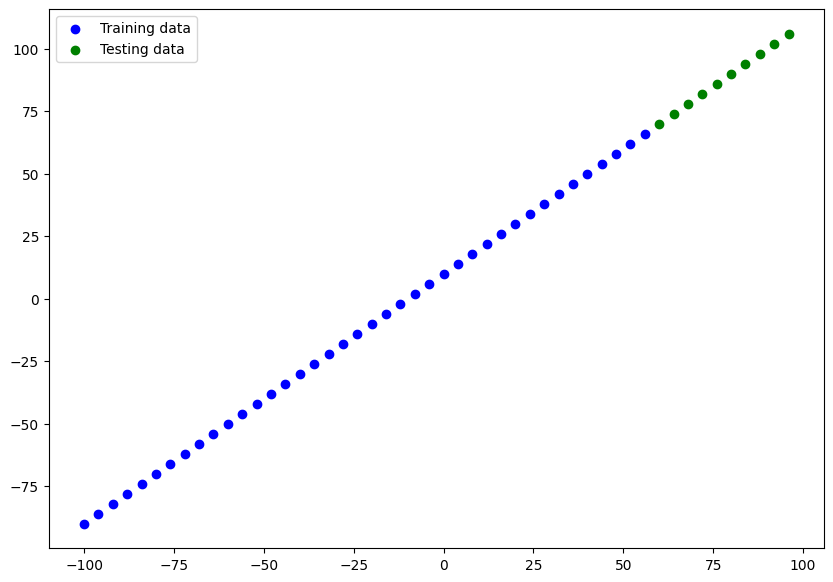

In [18]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [20]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [21]:

# This will work after specifying the input shape
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1) # verbose controls how much gets output

Epoch 1/100
2/2 [==============================] - 1s 25ms/step - loss: 76.5273 - mae: 76.5273
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 41.1800 - mae: 41.1800
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 9.5486 - mae: 9.5486
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 9.4882 - mae: 9.4882
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 10.3815 - mae: 10.3815
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.6217 - mae: 9.6217
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.7334 - mae: 8.7334
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0788 - mae: 9.0788
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 19.1189 - mae: 19.1189
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3341 - mae: 10.3341
Epoch 11/100
2/2 [==============================] - 0s 9ms/step

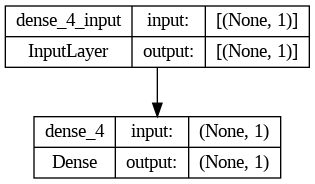

In [23]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [24]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 63ms/step


In [25]:
# View the predictions
y_preds

array([[56.472145],
       [60.152122],
       [63.8321  ],
       [67.51208 ],
       [71.192055],
       [74.87203 ],
       [78.552   ],
       [82.23198 ],
       [85.91196 ],
       [89.591934]], dtype=float32)

In [26]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

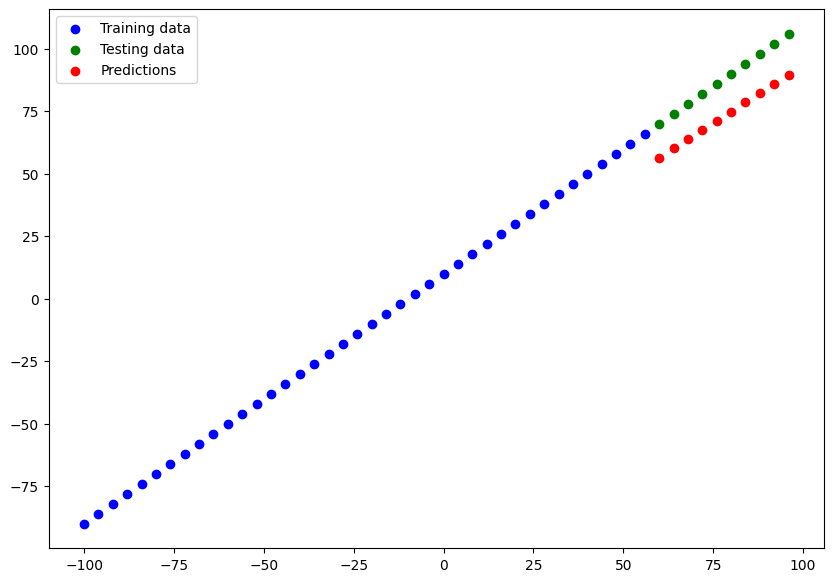

In [27]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

Two of the main metrics used for regression problems are:

Mean absolute error (MAE) - the mean difference between each of the predictions.
Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better

In [28]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 249ms/step - loss: 14.9680 - mae: 14.9680


[14.9679594039917, 14.9679594039917]

In [29]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([31.527857, 27.847876, 24.1679  , 20.487923, 17.046356, 14.276781,
       12.179199, 10.753604, 10.017609, 10.      ], dtype=float32)>

In [30]:

# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

In [31]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [32]:
# What do they look like?
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([56.472145, 60.152122, 63.8321  , 67.51208 , 71.192055, 74.87203 ,
        78.552   , 82.23198 , 85.91196 , 89.591934], dtype=float32))

In [33]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=14.967959>

In [34]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=224.88474>

In [35]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.
model_2 - 2 layers, trained for 100 epochs.
model_3 - 2 layers, trained for 500 epochs.

In [36]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 91.2315 - mae: 91.2315
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 55.7760 - mae: 55.7760
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 19.3688 - mae: 19.3688
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.9112 - mae: 9.9112
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.8681 - mae: 10.8681
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 10.0505 - mae: 10.0505
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0924 - mae: 9.0924
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1129 - mae: 9.1129
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 20.0101 - mae: 20.0101
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.8326 - mae: 10.8326
Epoch 11/100
2/2 [==============================] - 0s 8ms/st

1/1 [==============================] - 0s 67ms/step


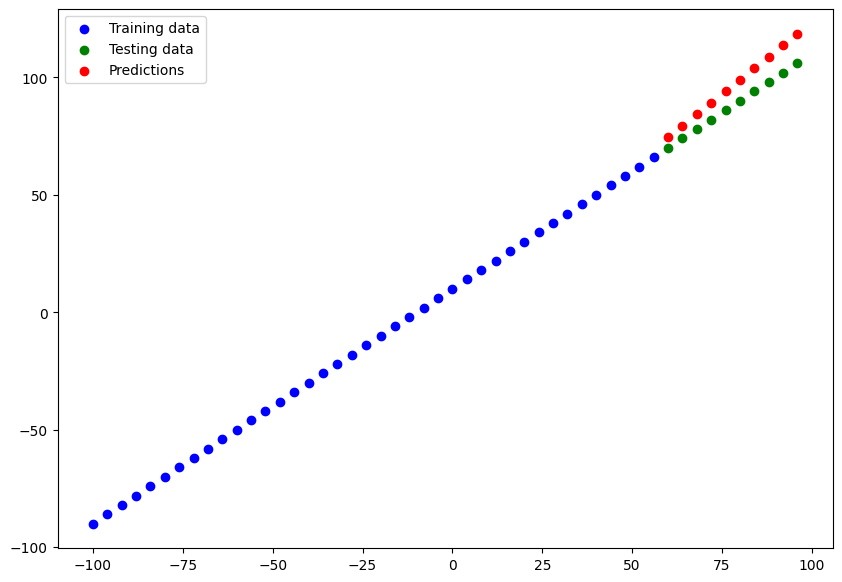

In [37]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [38]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(8.537139, 79.35532)

In [39]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output


1/1 [==============================] - 0s 71ms/step


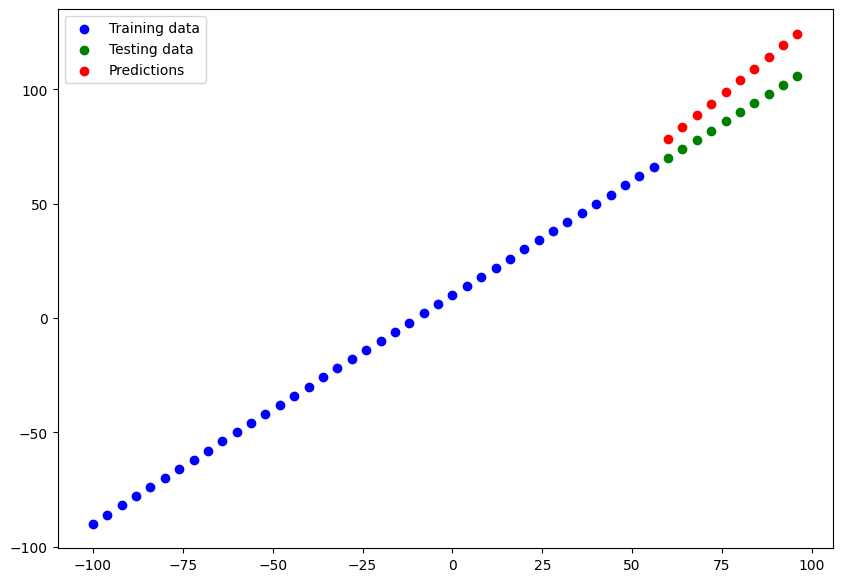

In [40]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [41]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(13.330783, 187.78162)

In [42]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output


1/1 [==============================] - 0s 71ms/step


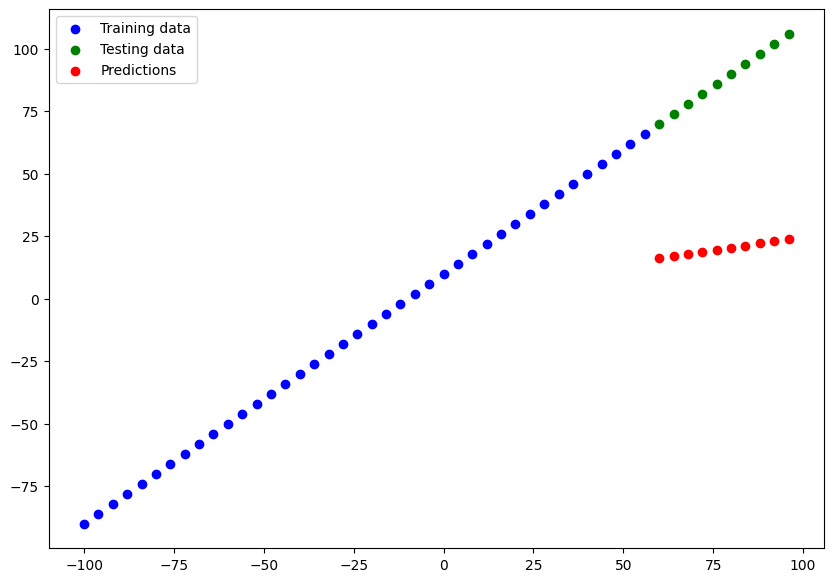

In [43]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [44]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.89554, 4694.1196)

In [45]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]


In [46]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.537139,79.355324
1,model_2,13.330783,187.781616
2,model_3,67.895538,67.895538


##Saving a Model

In [47]:
# Save a model using the SavedModel format
model_1.save('best_model_SavedModel_format')

In [48]:
# Save a model using the HDF5 format
model_1.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Compare model_2 with the SavedModel version (should return True)
model_1_preds = model_1.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_1_preds.squeeze()).numpy()



1/1 [==============================] - 0s 68ms/step


True

In [51]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:

# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_1_preds.squeeze()).numpy()


1/1 [==============================] - 0s 60ms/step


True

In [53]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Insurance problem

In [54]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [55]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [56]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot = insurance_one_hot.astype(int)  # Convert boolean values to 0/1
insurance_one_hot.head()  # View the converted columns with 0/1 representation


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [66]:
insurance_one_hot["sex_female"]

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: sex_female, Length: 1338, dtype: int64

In [67]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]


In [68]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # set random state for reproducible splits


In [70]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=['mae'])

# Fit the model (using the correct variable)
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13332.6396 - mae: 13332.6396
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12758.4971 - mae: 12758.4971
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12203.8701 - mae: 12203.8701
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12138.8994 - mae: 12138.8994
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 12045.4668 - mae: 12045.4668
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 11899.3535 - mae: 11899.3535
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 11645.9297 - mae: 11645.9297
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 11224.6582 - mae: 11224.6582
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 10639.2129 - mae: 10639.2129
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 9999.789

In [71]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8930.7754 - mae: 8930.7754


[8930.775390625, 8930.775390625]

In [75]:
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

In [76]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)


9/9 [==============================] - 0s 3ms/step - loss: 8632.7549 - mae: 8632.7549


[8632.7548828125, 8632.7548828125]

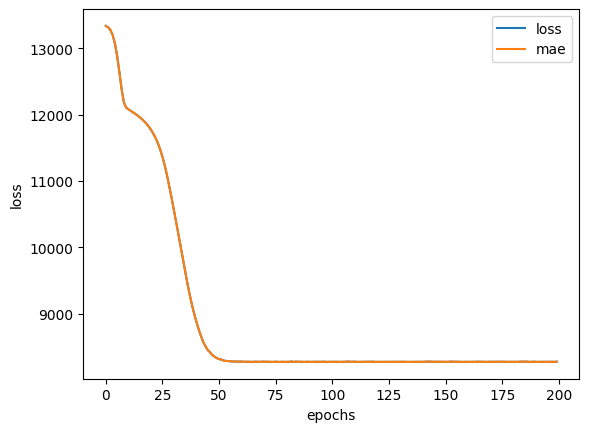

In [77]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [82]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(tf.expand_dims(X_train,axis =-1), y_train, epochs=200, verbose=0)

In [83]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 3ms/step - loss: 8632.3418 - mae: 8632.3418


(8632.341796875, 8632.341796875)

##Preprocessing data

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [87]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [88]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [89]:

# Normalized and one-hot encoded example
X_train_normal[0]


array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [95]:
X_train_normal.shape,X_train.shape

((1070, 11), (1070, 6))

In [97]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(tf.expand_dims(X_train_normal,axis=-1), y_train, epochs=200, verbose=0)

In [98]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8631.0254 - mae: 8631.0254


In [99]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(8632.341796875, 8631.025390625)